---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Mengecek deflasi 5 bulan berturut-turut di Indonesia"
subtitle: ""
summary: ""
authors: [admin]
tags: [economics,deflasi]
categories: [economics,deflasi]
date: 2024-10-05T14:06:59+11:00
lastmod: 2024-10-05T14:06:59+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

di Indonesia

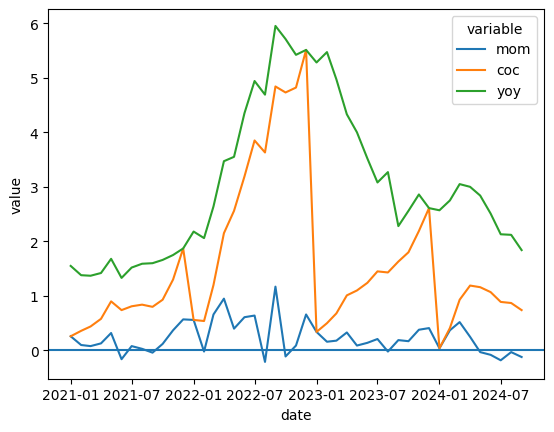

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data.iloc[:,0:4]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable')
plt.axhline(0)
